In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
import os

# Import API key
from api_keys import api_key

# set up the query URL
#api_key = api_keys.api_key
url = 'http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=' + api_key

print(url)

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = (os.path.join('output_data', 'cities.csv'))

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=116b5191e69d013991fb9c7216832c12


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500) # change to 1500 at end
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # replace space with a '%20' to correct the URL
    city = city.replace(' ', '%20')
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count & check lat lon output
#len(cities)
#cities
#print([lat_lng for lat_lng in zip(lats, lngs)])

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# PERFORM TEST API CALL
response = requests.get(f'{url}&q={city}').json()
# test response
#response


In [4]:
# Create emtpty lists to append all of the called API data into
cityName = []
country = []
date = []
tempF = []
humidity = []
clouds = []
windMPH = []
lat = []
lon = []

# initiate call counter
count = 1

# Logging statement
print(f'Retrieving Data')
print(f'-------------------------------')

# loop through all cities
for city in cities:
    
    # Set up a try loop in case coordinates generated have no city associated
    try:
        response = requests.get(f'{url}&q={city}').json()
        cityName.append(response['name'])
        clouds.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        tempF.append(response['main']['temp_max'])
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        windMPH.append(response['wind']['speed'])
        cityRecord = (response['name'])
        print(f'Record Processing  {count} | {cityRecord}')
        print(f'{url}&q={city}')
        # Increase counter by one 
        count= count + 1
        # Wait a second in loop to not over exceed rate limit
        time.sleep(1.01)
    except:
        print('City not found...skipping...')
    # If no record found "skip" to next call
    continue

Retrieving Data
-------------------------------
Record Processing  1 | Turka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=116b5191e69d013991fb9c7216832c12&q=turka
Record Processing  2 | Tomatlan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=116b5191e69d013991fb9c7216832c12&q=tomatlan
Record Processing  3 | Bluff
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=116b5191e69d013991fb9c7216832c12&q=bluff
Record Processing  4 | Hobart
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=116b5191e69d013991fb9c7216832c12&q=hobart
Record Processing  5 | Meulaboh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=116b5191e69d013991fb9c7216832c12&q=meulaboh
Record Processing  6 | Geraldton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=116b5191e69d013991fb9c7216832c12&q=geraldton
Record Processing  7 | Chalons-en-Champagne
http://api.openweathermap.org/data/2.5/weather?units=Imper

Record Processing  56 | Havoysund
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=116b5191e69d013991fb9c7216832c12&q=havoysund
Record Processing  57 | Elizabeth City
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=116b5191e69d013991fb9c7216832c12&q=elizabeth%20city
Record Processing  58 | Itarema
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=116b5191e69d013991fb9c7216832c12&q=itarema
Record Processing  59 | New Norfolk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=116b5191e69d013991fb9c7216832c12&q=new%20norfolk
Record Processing  60 | Ancud
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=116b5191e69d013991fb9c7216832c12&q=ancud
Record Processing  61 | Katherine
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=116b5191e69d013991fb9c7216832c12&q=katherine
Record Processing  62 | Port Alfred
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=116b5191

Record Processing  110 | Waingapu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=116b5191e69d013991fb9c7216832c12&q=waingapu
City not found...skipping...
Record Processing  111 | Quelimane
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=116b5191e69d013991fb9c7216832c12&q=quelimane
Record Processing  112 | Namibe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=116b5191e69d013991fb9c7216832c12&q=namibe
Record Processing  113 | Praia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=116b5191e69d013991fb9c7216832c12&q=praia
Record Processing  114 | Hilo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=116b5191e69d013991fb9c7216832c12&q=hilo
Record Processing  115 | Klaksvik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=116b5191e69d013991fb9c7216832c12&q=klaksvik
Record Processing  116 | Torbay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=116b5191e69

Record Processing  165 | Macomb
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=116b5191e69d013991fb9c7216832c12&q=macomb
Record Processing  166 | Fairbanks
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=116b5191e69d013991fb9c7216832c12&q=fairbanks
Record Processing  167 | Polunochnoye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=116b5191e69d013991fb9c7216832c12&q=polunochnoye
Record Processing  168 | Port Elizabeth
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=116b5191e69d013991fb9c7216832c12&q=port%20elizabeth
Record Processing  169 | Nyurba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=116b5191e69d013991fb9c7216832c12&q=nyurba
Record Processing  170 | Norman Wells
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=116b5191e69d013991fb9c7216832c12&q=norman%20wells
Record Processing  171 | Saskylakh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&a

Record Processing  220 | Arimalam
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=116b5191e69d013991fb9c7216832c12&q=arimalam
Record Processing  221 | Darhan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=116b5191e69d013991fb9c7216832c12&q=darhan
Record Processing  222 | Okhotsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=116b5191e69d013991fb9c7216832c12&q=okhotsk
Record Processing  223 | Verkhnevilyuysk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=116b5191e69d013991fb9c7216832c12&q=verkhnevilyuysk
Record Processing  224 | Rome
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=116b5191e69d013991fb9c7216832c12&q=roma
Record Processing  225 | Walvis Bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=116b5191e69d013991fb9c7216832c12&q=walvis%20bay
Record Processing  226 | Lagos
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=116b5191e69d013991f

City not found...skipping...
Record Processing  276 | Nchelenge
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=116b5191e69d013991fb9c7216832c12&q=nchelenge
Record Processing  277 | Zedelgem
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=116b5191e69d013991fb9c7216832c12&q=zedelgem
Record Processing  278 | Kununurra
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=116b5191e69d013991fb9c7216832c12&q=kununurra
Record Processing  279 | Jaciara
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=116b5191e69d013991fb9c7216832c12&q=jaciara
Record Processing  280 | Innisfail
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=116b5191e69d013991fb9c7216832c12&q=innisfail
Record Processing  281 | Iberia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=116b5191e69d013991fb9c7216832c12&q=iberia
Record Processing  282 | Sangar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&a

Record Processing  330 | Mehtar Lam
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=116b5191e69d013991fb9c7216832c12&q=mehtar%20lam
Record Processing  331 | Teluknaga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=116b5191e69d013991fb9c7216832c12&q=teluknaga
Record Processing  332 | Mayo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=116b5191e69d013991fb9c7216832c12&q=mayo
Record Processing  333 | Rathdrum
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=116b5191e69d013991fb9c7216832c12&q=rathdrum
Record Processing  334 | Madison
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=116b5191e69d013991fb9c7216832c12&q=madison
Record Processing  335 | Shache
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=116b5191e69d013991fb9c7216832c12&q=shache
Record Processing  336 | Smolenka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=116b5191e69d013991fb9c721683

Record Processing  385 | Batemans Bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=116b5191e69d013991fb9c7216832c12&q=batemans%20bay
Record Processing  386 | Iskateley
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=116b5191e69d013991fb9c7216832c12&q=iskateley
Record Processing  387 | Gimli
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=116b5191e69d013991fb9c7216832c12&q=gimli
City not found...skipping...
Record Processing  388 | Nishihara
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=116b5191e69d013991fb9c7216832c12&q=nishihara
Record Processing  389 | Tiznit
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=116b5191e69d013991fb9c7216832c12&q=tiznit
Record Processing  390 | Pointe Michel
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=116b5191e69d013991fb9c7216832c12&q=pointe%20michel
Record Processing  391 | Tura
http://api.openweathermap.org/data/2.5/weather?un

Record Processing  440 | Lensk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=116b5191e69d013991fb9c7216832c12&q=lensk
Record Processing  441 | Lazaro Cardenas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=116b5191e69d013991fb9c7216832c12&q=lazaro%20cardenas
Record Processing  442 | Saint-Francois
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=116b5191e69d013991fb9c7216832c12&q=saint-francois
Record Processing  443 | Dera Ghazi Khan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=116b5191e69d013991fb9c7216832c12&q=dera%20ghazi%20khan
Record Processing  444 | San Pedro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=116b5191e69d013991fb9c7216832c12&q=san%20pedro
Record Processing  445 | Wawa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=116b5191e69d013991fb9c7216832c12&q=wawa
Record Processing  446 | Agadez
http://api.openweathermap.org/data/2.5/weather?units=Imp

Record Processing  494 | Lazarev
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=116b5191e69d013991fb9c7216832c12&q=lazarev
Record Processing  495 | Daru
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=116b5191e69d013991fb9c7216832c12&q=daru
Record Processing  496 | Aklavik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=116b5191e69d013991fb9c7216832c12&q=aklavik
Record Processing  497 | Linjiang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=116b5191e69d013991fb9c7216832c12&q=linjiang
Record Processing  498 | Havre-Saint-Pierre
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=116b5191e69d013991fb9c7216832c12&q=havre-saint-pierre
Record Processing  499 | Young
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=116b5191e69d013991fb9c7216832c12&q=young
Record Processing  500 | Comodoro Rivadavia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=116b5191e6

Record Processing  549 | Pouebo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=116b5191e69d013991fb9c7216832c12&q=pouebo
Record Processing  550 | Ewa Beach
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=116b5191e69d013991fb9c7216832c12&q=ewa%20beach
Record Processing  551 | Mendi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=116b5191e69d013991fb9c7216832c12&q=mendi
Record Processing  552 | Majene
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=116b5191e69d013991fb9c7216832c12&q=majene
Record Processing  553 | Port Macquarie
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=116b5191e69d013991fb9c7216832c12&q=port%20macquarie
Record Processing  554 | Nipawin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=116b5191e69d013991fb9c7216832c12&q=nipawin
Record Processing  555 | Trairi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=116b5191e69d013991fb9c

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
weatherDictionary = {'Country': country, 'City': cityName, 
                     'Date': date, 'Temperature(F)': tempF, 'Cloud Density': clouds,
                     'Humidity': humidity, 'Humidity': humidity, 'Wind(MPH)': windMPH,
                     'Latitude': lat, 'Longitude': lon}
weatherDF = pd.DataFrame(weatherDictionary)

weatherDF.to_csv(os.path.join('outputCSV', 'weatherData.csv'))
weatherDF.head()

,Country,City,Date,Temperature(F),Cloud Density,Humidity,Wind(MPH),Latitude,Longitude
0,UA,Turka,1553359790,34.60,0,60,2.39,49.16,23.03
1,MX,Tomatlan,1553359791,85.54,0,45,3.62,19.93,-105.25
2,AU,Bluff,1553359793,70.24,0,89,3.74,-23.58,149.07
3,AU,Hobart,1553359756,64.40,75,77,6.93,-42.88,147.33
4,ID,Meulaboh,1553359795,77.80,36,100,3.40,4.14,96.13


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

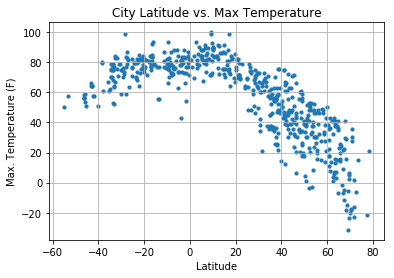

In [6]:
# Build scatterplot using column headers for hte X then Y Axis
plt.scatter(weatherDF['Latitude'], weatherDF['Temperature(F)'], marker='o', s=10)
# add other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
# save graph
plt.savefig(os.path.join('outputPlots', 'temperature-VS-latitude.png'))
# Show graph
plt.show()

#### Latitude vs. Humidity Plot

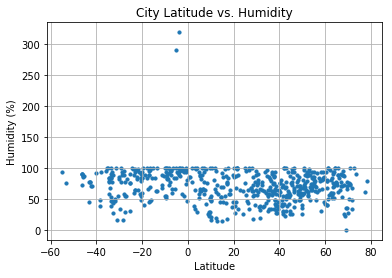

In [7]:
# Build a scatter plot for each data type
plt.scatter(weatherDF["Latitude"], weatherDF["Humidity"], marker="o", s=10)
# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig(os.path.join('outputPlots', 'humidity-VS-latitude.png'))
# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

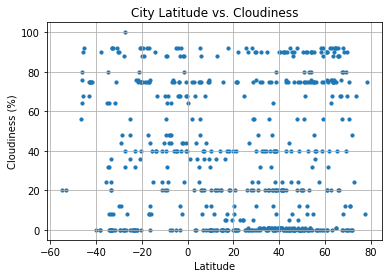

In [8]:

# Build a scatter plot for each data type
plt.scatter(weatherDF['Latitude'], weatherDF['Cloud Density'], marker="o", s=10)
# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig(os.path.join('outputPlots', 'cloudDeinsity-VS-latitude.png'))
# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

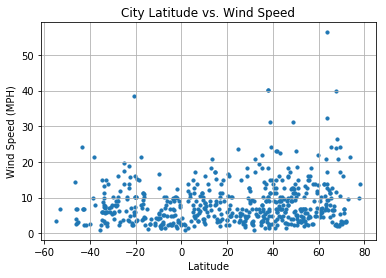

In [9]:
# Build a scatter plot for each data type
plt.scatter(weatherDF['Latitude'], weatherDF['Wind(MPH)'], marker='o', s=10)
# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed')
plt.ylabel('Wind Speed (MPH)')
plt.xlabel('Latitude')
plt.grid(True)
# Save the figure
plt.savefig(os.path.join('outputPlots', 'windSpeed-VS-latitude.png'))
# Show plot
plt.show()

WeatherPy

Analysis
- Weather becomes warmer when approaching the equator and pulling in data at this time of year shows that the Southern Hemisphere on average is warmer than the Northern, due to the tilt of the earth. 
- There is no strong correlation between latitude and cloudiness or wind. 
- It is interesting to see that there does not appear to be any correlation between Latitude and Humidity either, despite a clear correlation between Latitude and Temperature.